# Tutorial 3: Electron Energy Loss Spectroscopy

In this third tutorial, we will learn how to calculate the Electron Energy Loss
Spectrsocopy (EELS) using TDDFT.

During EELS, a charged particle (typically an electron), is passing in the vinicity 
of a molecule. The electric field generated by the moving charge excite the
system which will then create an induced electric field.

One of the advantage of electronic excitation is the possibility to excite
so call dark mode that can not be excited via light. For more details on the
method, you can refer to the chapter 6 of [Barbry2018thesis]_

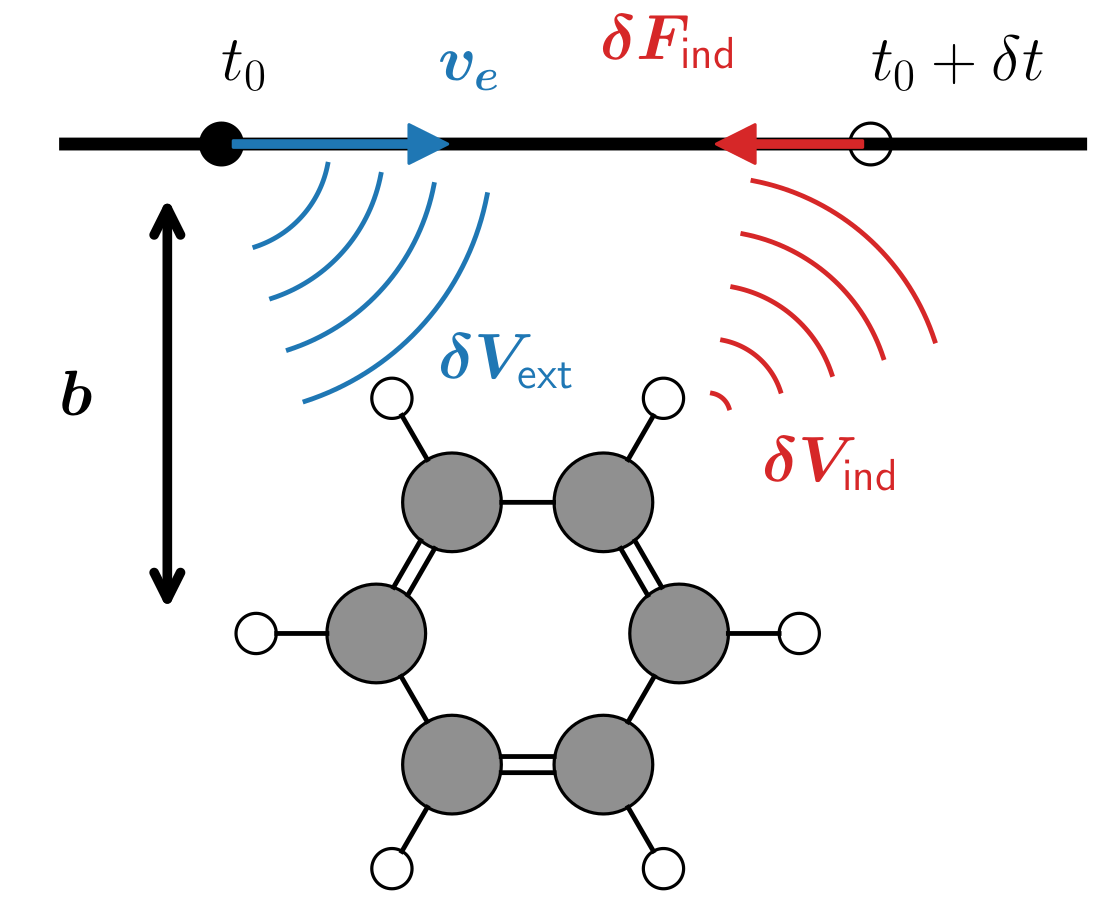

> **_Requirements:_**  Have executed tutorial 2

## Initialize TDDFT

As stated in the requirements, you must have executed the tutorial 2 before
to start this tutorial. Otherwise, the DFT inputs will not be present.

It is a good practice when running EELS calculations to check that the
electron trajectory do not intersect any atom before to start calculations.

We will start then by loading the deometry of the systems (file `siesta.xyz`)
using ASE, and define the trajectory of the electron.

In [ ]:
import numpy as np
import ase.io as io

atoms = io.read("siesta.xyz")
velec = np.array([0.0, 75.0, 0.0])
beam_offset = np.array([0.0, 0.0, 5.0])

Another condition to keep in mind is that the `beam_offset` (the `b` arrow on the top diagram)
must be perpendicular to the electron trajectory defined by the electron velocity vector
`velec`, i.e., `velec.dot(beam_offset) == 0.0`.

The function `pynao.tddft_tem.check_collision` check that all these conditions are respected.

In [ ]:
from pynao.tddft_tem import check_collision

print(atoms.positions.shape)
check_collision(velec, beam_offset, atoms.positions)

We can then initialize the TDDFT calculations in the same fashion than in tutorial 2.

In [ ]:
from pynao import tddft_iter

td = tddft_iter(label="siesta")

## Run TDDFT EELS calculations

Once the kernel has been calculated, we can calculate the EELS spectra of the
molecule by calling the method `get_EELS_spectrum`.
This method takes three main inputs:

* `freq`: the frequencies at which to calculate the spectra. The frequencies must be given in Hartree.
* `velec`: the velocity vector of the charged particle in atomic units. 100 keV $\sim$ 75.0 a.u.
* `beam offset`: the shift of the beam trajectory. must be perpendicular to `velec`

In [ ]:
from ase.units import Ha

freq = np.arange(0.0, 15.0, 0.05)/Ha
Vext, EELS = td.get_EELS_spectrum(freq, velec=velec, beam_offset=beam_offset)

In [ ]:
import matplotlib.pyplot as plt

h = 7
w = 4*h/3
ft = 20

fig = plt.figure(1, figsize=(w, h))
ax = fig.add_subplot(111)
ax.plot(freq*Ha, EELS.imag, linewidth=3)
ax.set_xlabel(r"Energy (eV)", fontsize=ft)
ax.set_ylabel(r"$\Gamma$ (a.u.)", fontsize=ft)
fig.tight_layout()

One can easily run sevral trajectories in a for loop by changing the electron velocity vector or the beam offset

In [ ]:
shifts = np.arange(-5.1, 5.5, 2.5)
velec = np.array([0.0, 25.0, 0.0])

gammas = []
for i, sh in enumerate(shifts):
    offset = np.array([0.0, 0.0, sh])
    Vext, EELS = td.get_EELS_spectrum(freq, velec=velec, beam_offset=offset)
    gammas.append(EELS)


In [ ]:
fig = plt.figure(2, figsize=(w, h))
ax = fig.add_subplot(111)

for i, sh in enumerate(shifts):
    ax.plot(freq*Ha, gammas[i].imag, linewidth=3, label="shift: {0:.2f} Bohr".format(sh))
ax.set_xlabel(r"Energy (eV)", fontsize=ft)
ax.set_ylabel(r"$\Gamma$ (a.u.)", fontsize=ft)
ax.legend(fontsize=ft-5)
fig.tight_layout()